## Importing Data

Let's import the libraries that will be used...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Data Analysis

Let's check the features and plot some graphs to understand them better...

### Parameters:

age: age in years

sex: (1 = male; 0 = female)

cp: chest pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rslope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target: 1 or 0 

*More info here: https://www.kaggle.com/ronitf/heart-disease-uci*

In [5]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [6]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [7]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [8]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [9]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

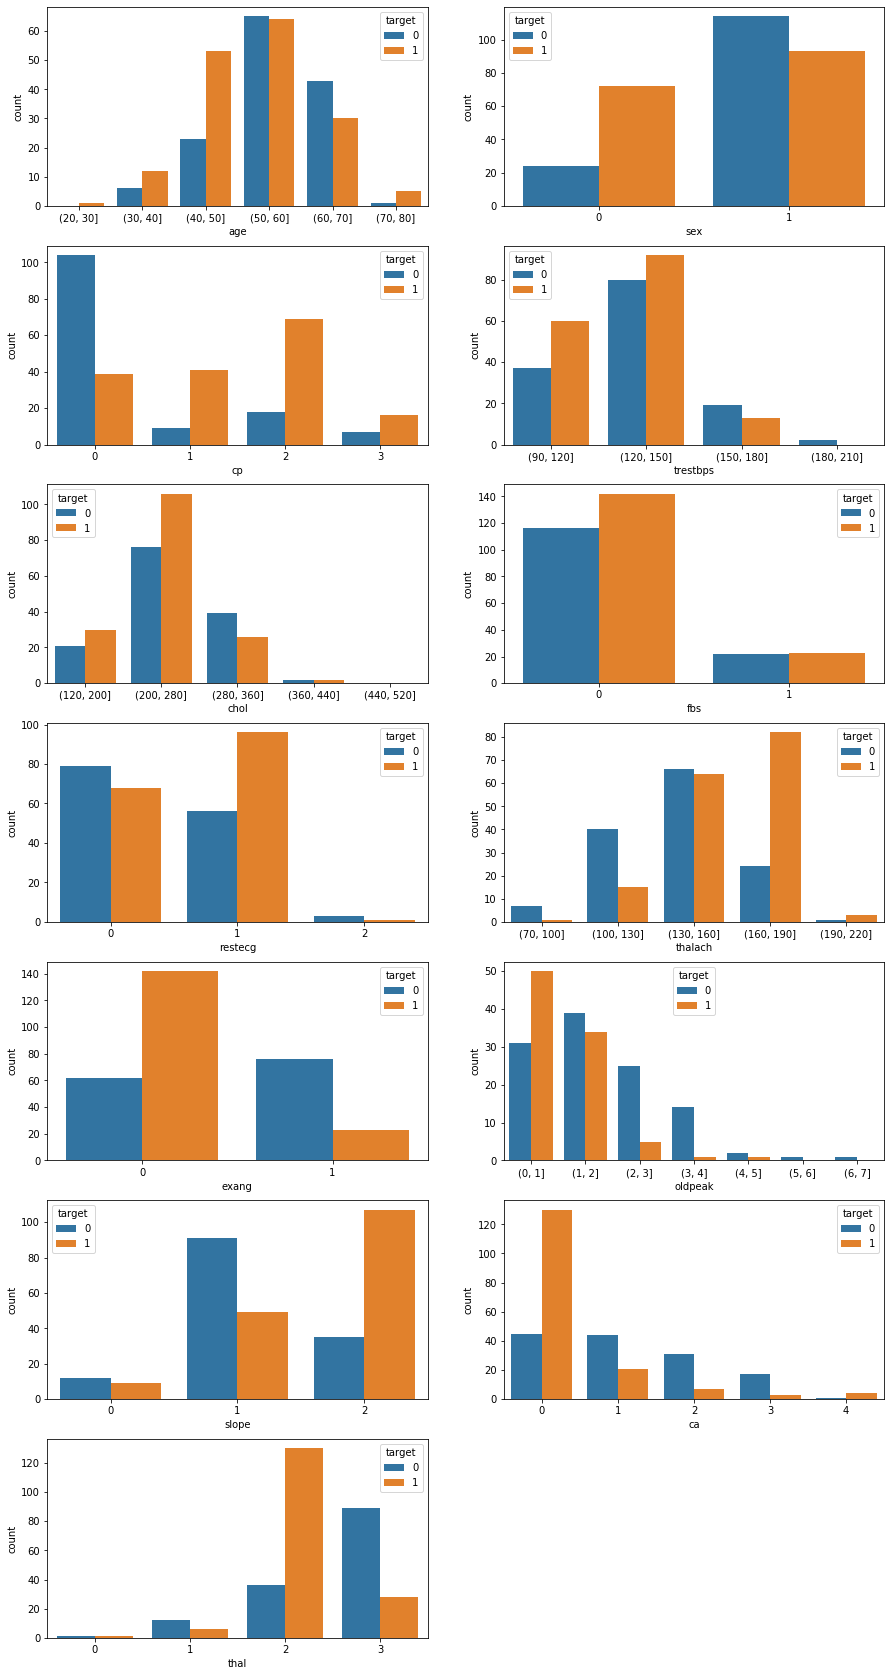

In [10]:
fig=plt.figure(figsize=(15,30))

fig.add_subplot(7,2,1)
sns.countplot(x=pd.cut(df['age'], bins=np.arange(20,90,10)),hue='target',data=df)

fig.add_subplot(7,2,2)
sns.countplot(x='sex',hue='target',data=df)

fig.add_subplot(7,2,3)
sns.countplot(x='cp',hue='target',data=df)

fig.add_subplot(7,2,4)
sns.countplot(x=pd.cut(df['trestbps'], bins=np.arange(90,220,30)),hue='target',data=df)

fig.add_subplot(7,2,5)
sns.countplot(x=pd.cut(df['chol'], bins=np.arange(120,580,80)),hue='target',data=df)

fig.add_subplot(7,2,6)
sns.countplot(x='fbs', hue='target',data=df)

fig.add_subplot(7,2,7)
sns.countplot(x='restecg',hue='target',data=df)

fig.add_subplot(7,2,8)
sns.countplot(x=pd.cut(df['thalach'], bins=np.arange(70,230,30)),hue='target',data=df)

fig.add_subplot(7,2,9)
sns.countplot(x='exang',hue='target',data=df)

fig.add_subplot(7,2,10)
sns.countplot(x=pd.cut(df['oldpeak'], bins=np.arange(0,8,1)),hue='target',data=df)

fig.add_subplot(7,2,11)
sns.countplot(x='slope',hue='target',data=df)

fig.add_subplot(7,2,12)
sns.countplot(x='ca',hue='target',data=df)

fig.add_subplot(7,2,13)
sns.countplot(x='thal',hue='target',data=df)

plt.show()

We can plot the correlation between all features in a heatmap to see which ones affects more the output (*target*)...

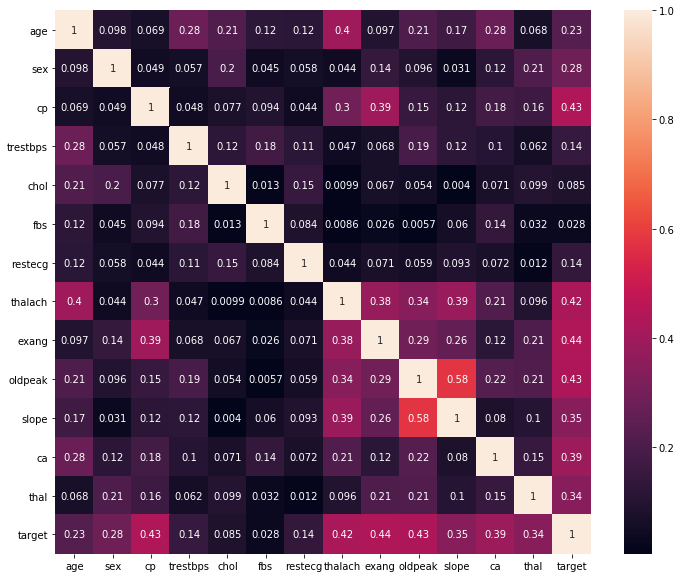

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True) #Shows the features correlation. ps: there's a bug on matplotlib #3.1.1.
plt.show()

From the above graph, we see that *exang*, *cp*, *oldpeak*, *thalach* and *ca* have a stronger affect on the output.  
Later, after building some models like *Decision Tree* or *Random Forest*, we can check the models importance to check if they match with this result.

## Spliting the data

I'll be using *Cross-validation* to test some models.  
Although the *Cross-validation* is a good measure, I think is a good idea to separe 20% of the dataset as a unseen data to test the model...

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis =1), df['target'], test_size=0.2, random_state=2)

In [13]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2


In [14]:
X_train.shape

(242, 13)

## Checking if dataset is balanced

If the train dataset (*X_train* and *y_train*) is perfectly balanced, as the target is wether 0 or 1, we should expect the mean equal to 0.5 (50%)...

In [15]:
y_train.mean()

0.5619834710743802

## Balancing the data

As we can se the dataset isn't balanced, let's balance it using the *SMOTE*, an Over-sampling technique...

In [16]:
sm = SMOTE(random_state=1)
X_train_balanced, y_train_balanced= sm.fit_resample(X_train, y_train)

In [17]:
X_train_balanced.shape

(272, 13)

In [18]:
y_train_balanced.shape

(272,)

In [19]:
y_train_balanced.mean()

0.5

## Building some Models

Let's try out some models and see the *Cross-validation* results for each one of them.  
I'll be using an arbitrary *random_state* value in an attempt to get the same results everytime a run the same model...

In [20]:
dt = DecisionTreeClassifier(random_state=2)

print('CV score:', cross_val_score(dt, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.7462157809983897


In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=2)

print('CV score:', cross_val_score(rf, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.81256038647343


In [22]:
knn = KNeighborsClassifier(n_neighbors=1, leaf_size=1000, p=1)

print('CV score:', cross_val_score(knn, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.7055555555555556


In [23]:
lr = LogisticRegression(random_state=2, solver='lbfgs', max_iter=1500) #Parameters added to disable warnings

print('CV score:', cross_val_score(lr, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.8052334943639291


In [24]:
svm = SVC(gamma='auto',random_state=2)

print('CV score:', cross_val_score(svm, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.5474235104669888


## Hyperparameters Tuning (Random Forest)

From the above scores, we can see that the best models were *Random Forest* and *Logistic Regression*.  
So let's try to tune their hyperparameters to get better scores...

In [25]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [26]:
rf_grid = RandomForestClassifier(random_state=2) # creates a new estimator

# Create the parameter grid based on the results of random search 
rf_param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 5, 10],
              'n_estimators': [100, 300, 500]}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
rf_grid_search = GridSearchCV(estimator=rf_grid, param_grid=rf_param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

rf_grid_search.fit(X_train_balanced, y_train_balanced)
rf_grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   33.6s finished
/home/vinicius/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [27]:
rf_best_grid = rf_grid_search.best_estimator_
rf_best_grid # Note that it's a classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [28]:
print('CV score:', cross_val_score(rf_best_grid, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.8383252818035426


## Exploring Random Forest Results

*Random Forest* can deliver some great informations about the model, like feature importances and the decision trees used to classify the data.  
Let's check them...

In [29]:
rf_best_grid.feature_importances_

array([0.07355142, 0.04367444, 0.13079751, 0.0674422 , 0.08102473,
       0.0098101 , 0.03053012, 0.11216764, 0.07384062, 0.08666705,
       0.06578268, 0.12411281, 0.1005987 ])

In [30]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_best_grid.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
cp,0.131
ca,0.124
thalach,0.112
thal,0.101
oldpeak,0.087
chol,0.081
age,0.074
exang,0.074
trestbps,0.067


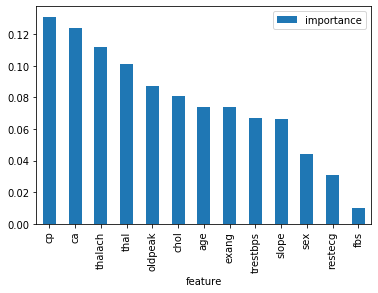

In [31]:
importances.plot.bar()
plt.show()

From the above graph, we can see that the most important features kind of match our expectations from the heatmap previously plotted.  
Let's also plot the *Decision Tree* with the code below...

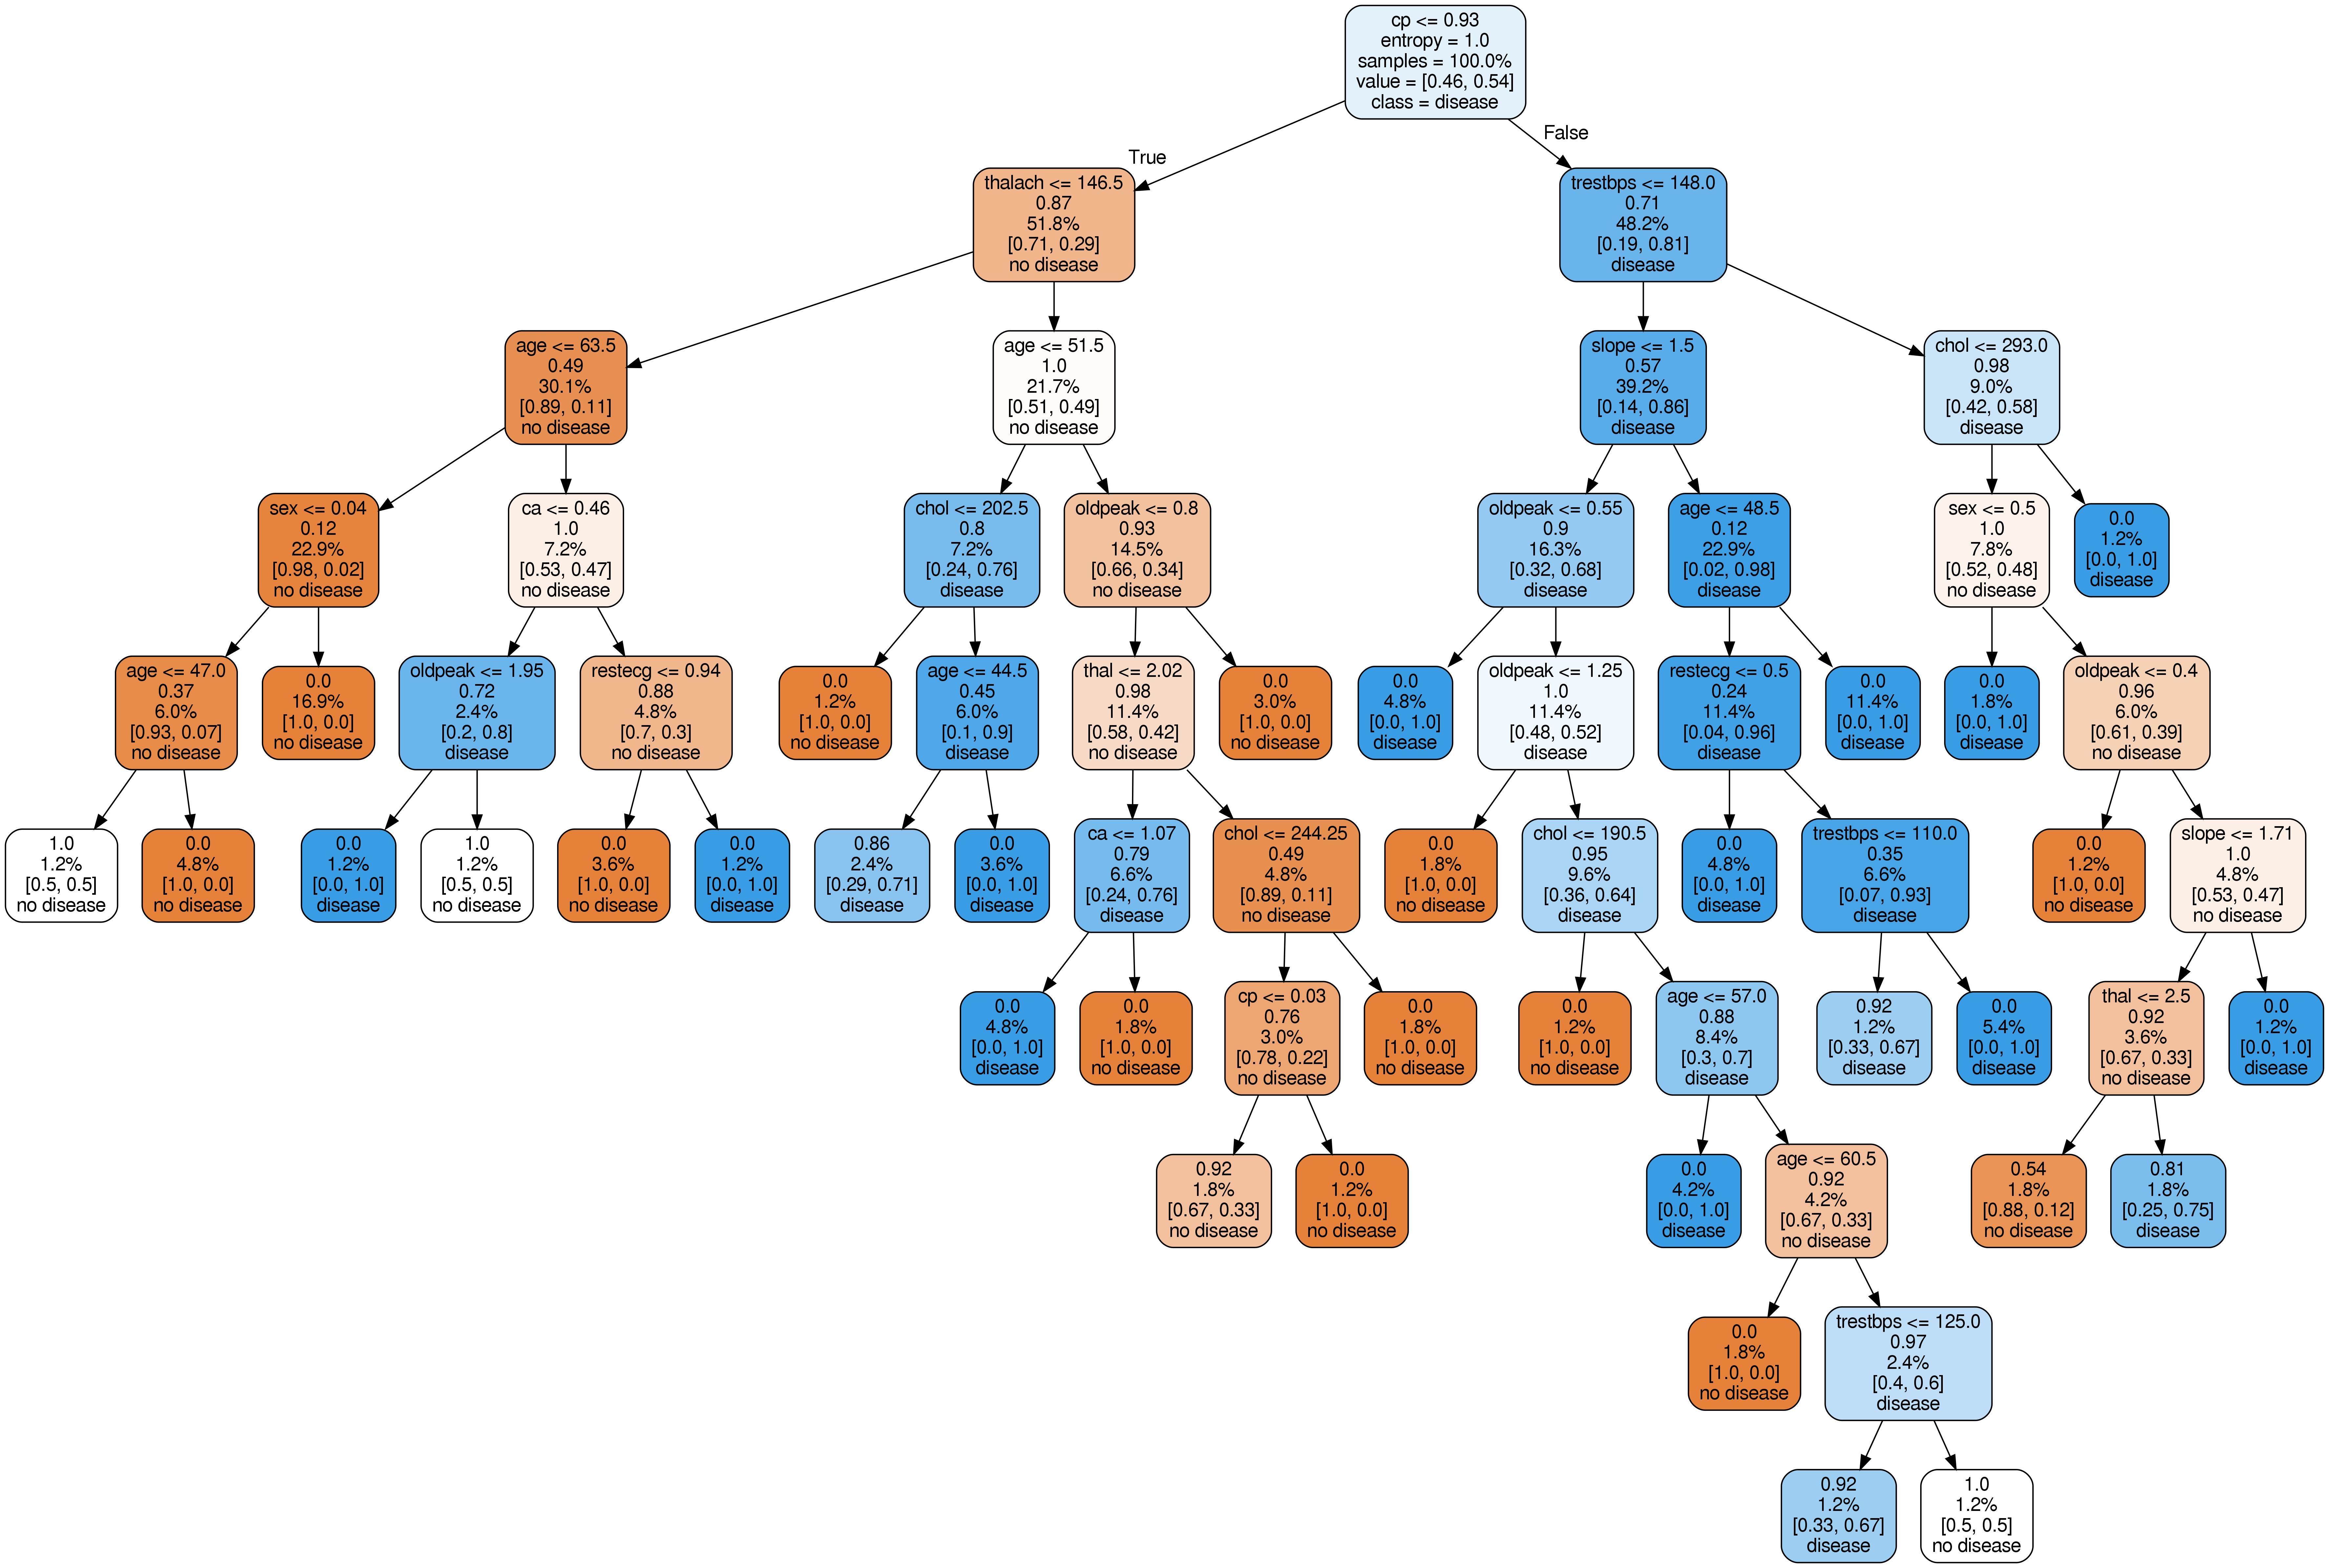

In [32]:
#based on https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

export_graphviz(rf_best_grid.estimators_[0], out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['no disease', 'disease'],
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=300'])

Image(filename = 'tree.png')

## Hyperparameters Tuning (Logistic Regression)

Now it's time to tune the *Logistic Regression* model...

In [33]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 1500,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
lr_grid = LogisticRegression(random_state=2)

# Create the parameter grid based on the results of random search 
lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'C': [1, 2, 3],
              'max_iter': [1500, 2000],
              'multi_class': ['warn', 'multinomial']}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
lr_grid_search = GridSearchCV(estimator=lr_grid, param_grid=lr_param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

lr_grid_search.fit(X_train_balanced, y_train_balanced)
lr_grid_search.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    7.8s finished
/home/vinicius/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 2, 'max_iter': 1500, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

In [35]:
lr_best_grid = lr_grid_search.best_estimator_
lr_best_grid # Note that it's a classifier

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=2, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
print('CV score:', cross_val_score(lr_best_grid, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.8162640901771336


## Evaluation Results

Now, for evaluation purpose, let's choose the best the best model based on the test data...  

In [37]:
print('RF Test Score:', rf_best_grid.score(X_test, y_test))
print('LR Test Score:', lr_best_grid.score(X_test, y_test))

RF Test Score: 0.8852459016393442
LR Test Score: 0.8852459016393442


We can see from above the results are the same.  
So, let's stick with the *Random Forest* as our best model...

In [38]:
best_model = rf_best_grid

Making the predictions (only for visualization)...

In [39]:
pred = best_model.predict(X_test)
pred[:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [40]:
results = pd.DataFrame()
results['Prediction']=pred
results['Real']=list(y_test)
results['Status']=['Right' if pred[n] == list(y_test)[n] else 'Wrong' for n in range(len(pred))]

results.head(10)

,Prediction,Real,Status
0,1,1,Right
1,1,0,Wrong
2,1,1,Right
3,1,1,Right
4,0,0,Right
5,0,0,Right
6,1,1,Right
7,1,1,Right
8,0,0,Right
9,1,1,Right


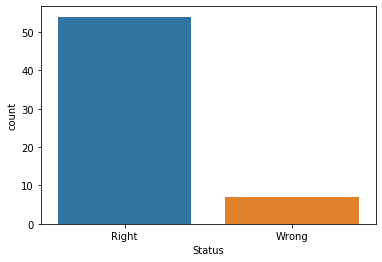

In [41]:
sns.countplot(results['Status'])
plt.show()

This report shows the final model precision...

In [42]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.97      0.82      0.89        34

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61

